In [11]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
column_names = ['id', 'age', 'gender', 'height', 'weight',
                'systolic_pressure', 'diastolic_pressure', 'cholesterol',
                'glucose', 'smoking', 'alcohol_intake', 'physical_activity',
                'cardio_disease']

cardio_data = pandas.read_csv(
    'data/cardio_train.csv', 
    header=0, 
    names=column_names, 
    delimiter=';'
)
cardio_data.head()

,id,age,gender,height,weight,systolic_pressure,diastolic_pressure,cholesterol,glucose,smoking,alcohol_intake,physical_activity,cardio_disease
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
feature_columns = ['age', 'gender', 'height', 'weight',
                    'systolic_pressure', 'diastolic_pressure', 'cholesterol',
                    'glucose', 'smoking', 'alcohol_intake', 'physical_activity']
x = cardio_data[feature_columns]
y = cardio_data['cardio_disease']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.3, 
    random_state=1
)

In [17]:
classification_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
classification_tree = classification_tree.fit(x_train, y_train)
y_prediction = classification_tree.predict(x_test)

In [18]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_prediction))

Accuracy:  0.7303809523809524


In [19]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

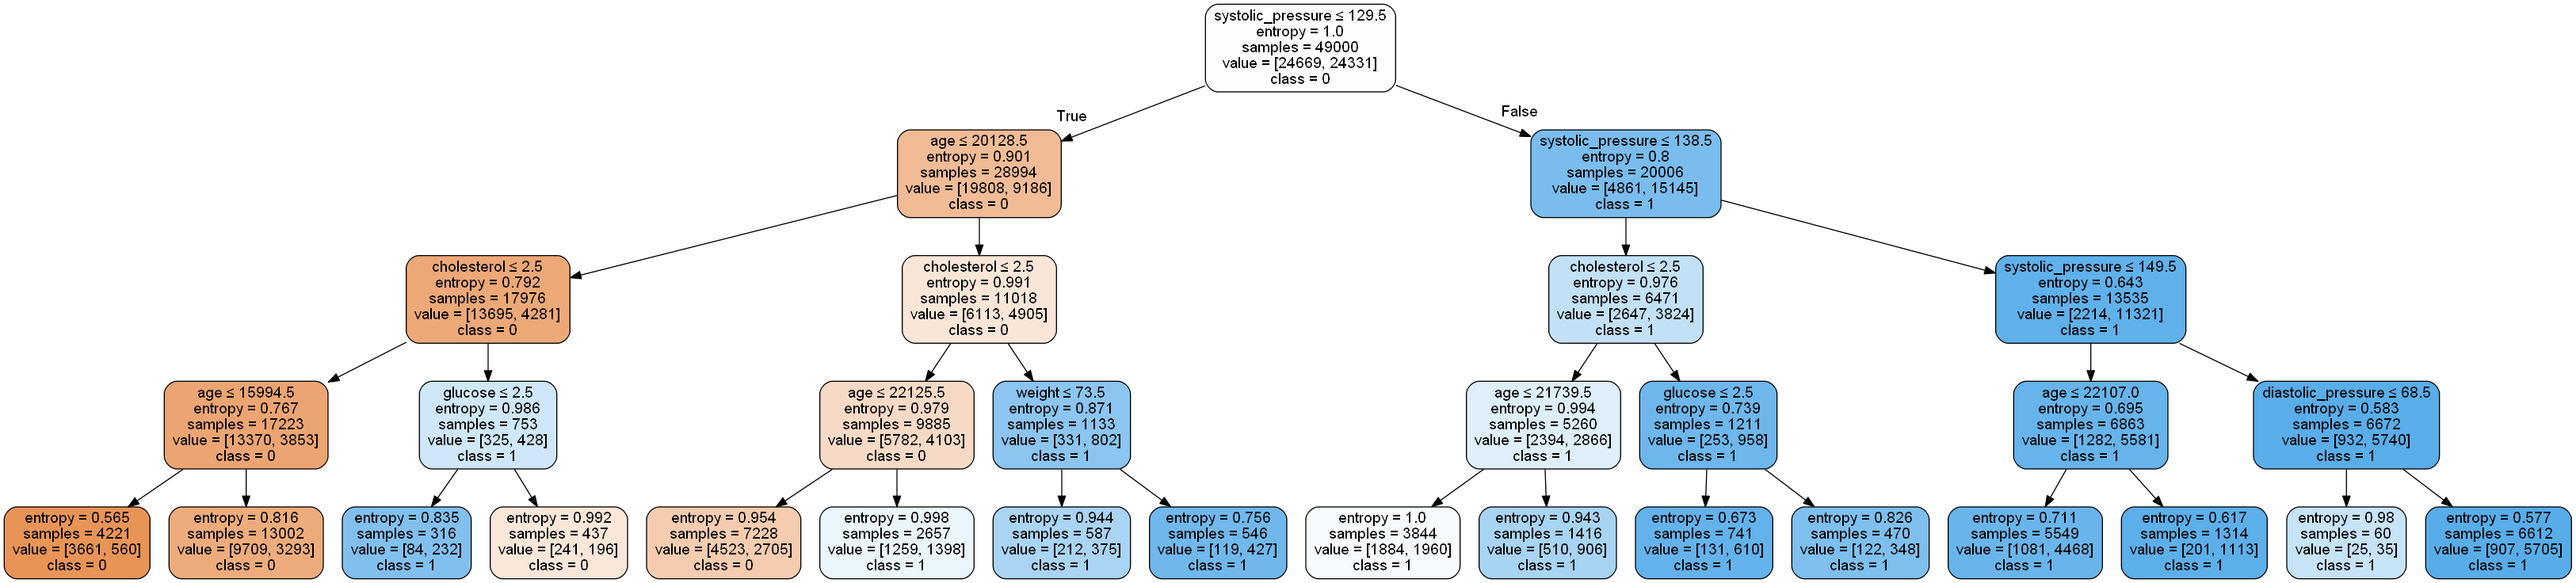

In [20]:
dot_data = StringIO()
export_graphviz(
    classification_tree,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_columns,
    class_names=['0', '1']
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('cardio_DTL.png')
Image(graph.create_png())